<a href="https://colab.research.google.com/github/hisyamhilmiomar/algoTradingStrat/blob/main/Mean_Reversion_Trading_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Mean Reversion is a financial theory which suggests
that asset prices and historical returns would eventually revert to their long-term mean/ average level at some point.

- This strategy can be looked at in many ways (Linear regression, moving average). For this model, it would use a moving average approach to determine the mean.

- Things to consider : How do we measure if the price is diverting too far from the average? For this model, it would be using percentiles as measurement.



In [ ]:
#Importing the necessary libraries for the model.

import pandas as pd #Data manipulation & analysis
import numpy as np #Numerical Operations
import yfinance as yf #Retrieving stock data from Yahoo Finance
import matplotlib.pyplot as plt #Data plotting and visualisation
from matplotlib import rcParams #Configure default styles and settings for Matplotlib plots
rcParams['figure.figsize'] = 8,6
import seaborn as sb #Statistical Data Visualisation
sb.set()

In [ ]:
symbol = 'GLD' #Ticker that is used for the model's analysis

gld = yf.download(symbol, start='2019-01-01', end='2024-01-01') #Downloading the 5 years stock data from Yahoo Finance under the gld variable
gld.drop(columns=['Open','High','Low','Adj Close', 'Volume'], inplace = True) #Dropping other unrelated columns
gld = pd.DataFrame(gld) #Applying the data into a dataframe format

[*********************100%%**********************]  1 of 1 completed


In [ ]:
gld.head() #To display first 5 entries in the data frame.

,Close
Date,
2019-01-02,121.330002
2019-01-03,122.430000
2019-01-04,121.440002
2019-01-07,121.860001
2019-01-08,121.529999


In [ ]:
ma = 21 #moving average
gld['returns'] = np.log(gld["Close"]).diff() #Calculating the instantaneous rate of return, close to close
gld ['ma'] = gld['Close'].rolling(ma).mean() #To keep track of the mean, which would be based of the closing price in a 21-day trading month average price
gld['ratio'] = gld['Close']/ gld['ma'] #To determine how far it is from the moving average (if it goes above it, go short and if it goes below it, go long) which will be derived by dividing the closing price with the moving average

In [ ]:
gld['ratio'].describe() #Descriptive statistics for the 'ratio' column.

count    1238.000000
mean        1.003637
std         0.022818
min         0.915509
25%         0.989375
50%         1.002332
75%         1.017749
max         1.087576
Name: ratio, dtype: float64

In [ ]:
percentiles = [5,10,50,90,95]
p = np.percentile(gld['ratio'].dropna(), percentiles)
print(p)

[0.96731465 0.97694297 1.0023322  1.03227805 1.04166816]


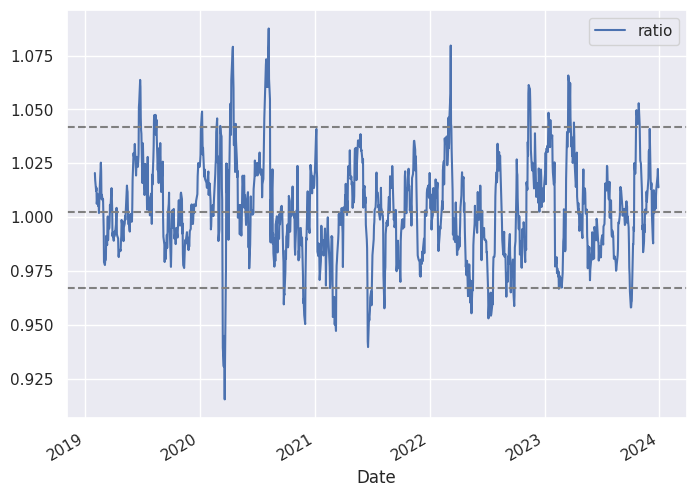

In [ ]:
gld['ratio'].dropna().plot(legend = True) #Plots the movement of price from the moving average

#Horizontal dashed lines to draw where the price breaks are (5%, 50%, 95%)
plt.axhline(p[0], c = (.5,.5,.5), ls= '--')
plt.axhline(p[2], c = (.5,.5,.5), ls= '--')
plt.axhline(p[-1], c = (.5,.5,.5), ls= '--')

In [ ]:
short = p[-1] #go short when the price is within 95%
long = p[0] #go long when price is within 5%

#Labels the position of short and long positions
gld['position'] = np.where(gld.ratio > short, -1, np.nan)
gld['position'] = np.where(gld.ratio < long, 1, gld['position'])
gld['position'] = gld['position'].ffill()

<Axes: xlabel='Date'>

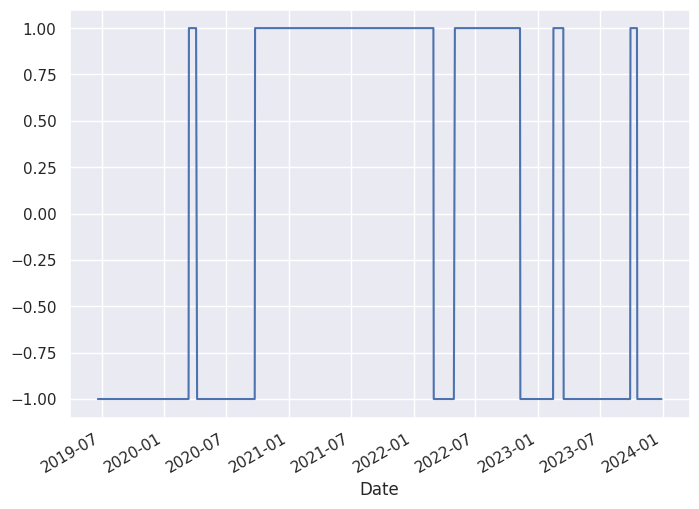

In [ ]:
gld.position.dropna().plot()

In [ ]:
gld['strat_return'] = gld['returns'] * gld['position'].shift() #Calculates the strategy model's return

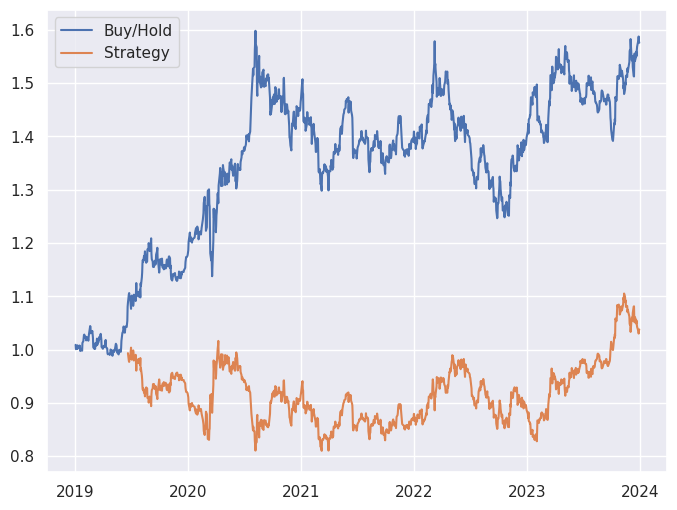

In [ ]:
#Plots the difference between the returns from the Mean Reversion strategy and Buy/Hold strategy

plt.plot(np.exp(gld['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();

In [ ]:
# Prints the return for both buy/hold strategy and mean reversion strategy
print(np.exp(gld['returns']).cumprod()[-1]-1)
print(np.exp(gld['strat_return']).cumprod()[-1]-1)


0.5756201704763739
0.037825231120255376
